# Data Science Final Project: Part 1 Analysis

This is a preliminary analysis of the rental data to predict rents for test 2 data. It is expected further work in Part 2 will result in improved estimations. This analysis and the outcomes will form the basis of Part 2.  
This file has been broken up into 3 parts: 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [2]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [3]:
train_df.sample(5).transpose()

rental_id,7327024,7380433,7165192,7157698,7418575
addr_unit,#A,#5,#9G,#2BB,#12E
building_id,75721,18375304,30589,110710,86119
bedrooms,0,1,1,1,1
bathrooms,1,1,1,1,1
size_sqft,0,800,650,450,725
created_at,2018-07-02 17:09:55,2018-07-18 17:56:43,2018-05-10 13:11:39,2018-05-08 13:29:47,2018-07-28 12:12:34
addr_street,125 EAST 71 STREET,105-01 65 ROAD,61 JANE STREET,280 WEST 117 STREET,301 EAST 87 STREET
addr_city,New York,Forest Hills,New York,New York,New York
addr_zip,10021,11375,10014,10026,10128
addr_lat,40.7702,40.7307,40.7384,40.8047,40.7786


In [3]:
train_df.shape

(12000, 38)

In [4]:
test_df.shape

(2000, 38)

In [5]:
test2_df.shape

(2000, 38)

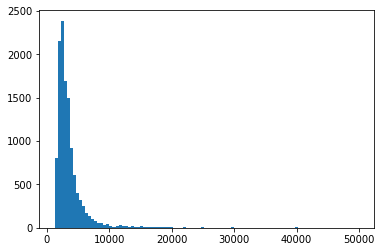

In [6]:
_ = plt.hist(train_df['rent'], bins=100)

In [7]:
train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

In [8]:
train_df['rent'].isna().sum()

0

In [9]:
print(list(train_df))

['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']


In [10]:
train_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [11]:
train_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,...,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,...,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,...,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,...,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,...,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,...,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,...,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,...,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,...,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,...,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707


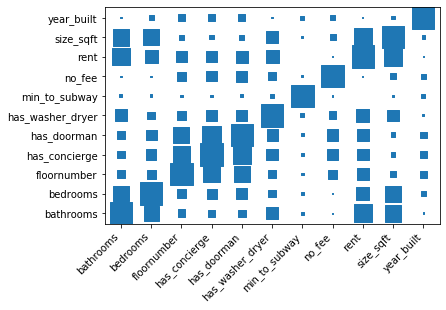

In [12]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

columns = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman', 'rent', 'has_washer_dryer', 'has_concierge', 'floornumber'
]
corr = train_df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

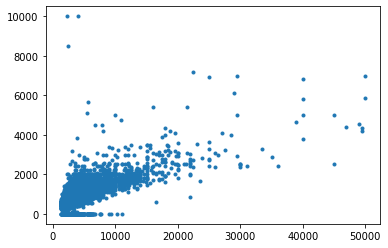

In [13]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

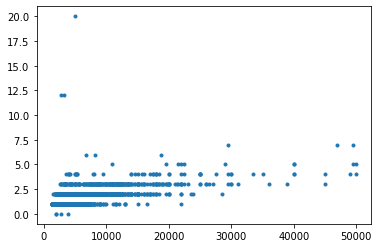

In [14]:
_ = plt.plot(train_df['rent'], train_df['bathrooms'], marker='.', linestyle='none')

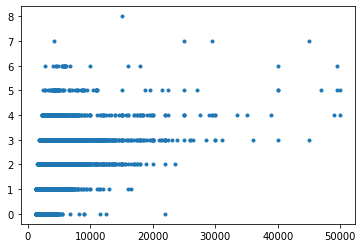

In [15]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [16]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
train_features = train_df[feature_cols] 

Adding a new feature using existing data: Distance to Central Park. Idea: the closer to central park the more the rent. 

In [17]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm(lat1,lon1,lat2=40.78,lon2=-73.965):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [18]:
train_df2 = train_df
test_df2 = test_df

In [19]:
train_df2['dist_centralPark'] = getDistanceFromLatLonInKm(train_df['addr_lat'], train_df['addr_lon'])
test_df2['dist_centralPark'] = getDistanceFromLatLonInKm(test_df['addr_lat'], test_df['addr_lon'])

In [20]:
train_df['dist_centralPark'].head(20)

rental_id
7236931    14.796742
7331920     7.806511
7139224     2.743952
7364827     3.660724
7242151    11.126183
7171210     2.331770
7286986     7.900183
7418503     2.803593
7304773     3.370226
7180240     2.530775
7199509     6.520788
7374106     7.727537
7211146     5.455471
7205032     9.249498
7303381     6.165054
7257553    10.045174
7371094     9.455008
7386616    19.309963
7161667     1.416285
7256881     1.781116
Name: dist_centralPark, dtype: float64

(0, 10000)

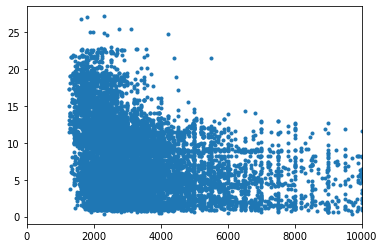

In [21]:
_ = plt.plot(train_df['rent'], train_df['dist_centralPark'], marker='.', linestyle='none')
plt.xlim(0, 10000)
# not really a correlation

In [22]:
# extract usable features
feature_cols2 = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark'
]
train_features2 = train_df2[feature_cols2] 

## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. This round we will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. 

In [23]:
train_df['bedrooms'].isna().sum()


0

In [16]:
train_df['year_built'].isna().sum()

403

In [17]:
train_df['bathrooms'].isna().sum()

0

In [18]:
train_df['min_to_subway'].isna().sum()

126

In [19]:
train_df['size_sqft'].isna().sum()

0

In [0]:
train_df['no_fee'].isna().sum()

0

In [0]:
train_df['has_doorman'].isna().sum()

0

In [0]:
train_df['has_washer_dryer'].isna().sum()

0

In [0]:
train_df['floornumber'].isna().sum()

1277

In [24]:
train_df['floornumber'].describe()


count    10723.000000
mean         6.182738
std          7.671545
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [25]:

test_df['floornumber'].describe()

count    1775.000000
mean        6.291831
std         8.066341
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        71.000000
Name: floornumber, dtype: float64

In [26]:
train_df['min_to_subway'].describe()

count     11874.000000
mean         73.588716
std        2681.611157
min           0.016700
25%           1.616700
50%           2.750000
75%           4.366700
max      103343.616700
Name: min_to_subway, dtype: float64

In [27]:
test_df['min_to_subway'].describe()

count    1983.000000
mean        3.768095
std         4.110479
min         0.016700
25%         1.666700
50%         2.816700
75%         4.458350
max        57.583300
Name: min_to_subway, dtype: float64

In [28]:
train_df['year_built'].describe()

count    11597.000000
mean      1935.982668
std        158.157134
min          0.000000
25%       1915.000000
50%       1931.000000
75%       1987.000000
max       2019.000000
Name: year_built, dtype: float64

In [29]:
test_df['year_built'].describe()

count    1933.000000
mean     1934.515261
std       164.135048
min         0.000000
25%      1915.000000
50%      1931.000000
75%      1987.000000
max      2019.000000
Name: year_built, dtype: float64

The features all have large outliers that result in a much higher mean than median so we will use median for the impute value for the missing values. 

In [30]:
# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [31]:
# impute missing values with medians
train_features2 = train_features2.fillna(train_features2.median(), axis=0)

# construct target vector
train_target2 = train_df2['rent']

#### 2. Outlier Data
From the above analysis it can be seen that the size_sqft and bathrooms have the value 0 for some data points. It is not possible for a rental space to have no size and it unusal for no bathroom in a rental. 

In [32]:
(train_features['size_sqft']==0).sum()
## 841 values have outlier value of 0 for size_sqft

841

In [33]:
(test_features['size_sqft']==0).sum()

NameError: name 'test_features' is not defined

In [63]:
(test2_df['size_sqft']==0).sum()

177

In [22]:
(train_features['bathrooms']==0).sum()
## 4 values have outlier value of 0 for bathrooms...No bathrooms??

4

In [57]:
(test_features['bathrooms']==0).sum()

3

In [0]:
(train_features['bedrooms']==0).sum()
## 1556 values have outlier value of 0 for bedrooms...No bedrooms??Commercial rental?

1556

In [0]:
no_bedrooms = train_df[train_df['bedrooms']==0]

In [70]:
no_bedrooms.head(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,dist_centralPark
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,-74.004799,1001883.0,1001737504,17.0,2014.0,3.2333,1,1,0,1,0,1,1,1,0,1,1,0,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06,7.806511
7418503,#6G,18341149,0,1.0,500.0,2018-07-28 10:25:29,11-05 30 ROAD,Astoria,11102,40.771198,-73.933800,4000000.0,4005060029,0.0,NaN,11.9500,1,1,0,1,0,1,0,0,0,1,1,0,0,0,2075,0,"Priceless view of NYC, 2 separate rooftops, 24...",Astoria,Queens,6G,6.0,G,2.803593
7180240,#23B,69853,0,1.0,400.0,2018-05-15 17:04:06,250 EAST 54 STREET,New York,10022,40.757301,-73.967201,1038562.0,1013277502,43.0,1990.0,1.2167,1,1,0,1,0,1,1,0,0,1,1,0,0,0,2800,1,"Make yourself at home at The Mondrian, Midtown...",Midtown East,Manhattan,23B,23.0,B,2.530775
7161667,#3C,78679,0,1.0,440.0,2018-05-09 13:51:48,1388 2 AVENUE,New York,10021,40.768289,-73.958386,1044857.0,1014460004,4.0,1915.0,6.0167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1685,0,Large pre -war studio w High CEILINGS\r\nRENT ...,Upper East Side,Manhattan,3C,3.0,C,1.416285
7179904,#28Q,52861,0,1.0,608.0,2018-05-15 16:05:48,322 WEST 57TH STREET,New York,10019,40.766800,-73.984200,1025450.0,1010477503,50.0,1978.0,1.6667,1,1,0,0,0,1,1,0,1,1,1,1,0,1,3138,1,"The rent is $3,400/month. However, Landlord gi...",Midtown West,Manhattan,28Q,28.0,Q,2.183633
7279090,#30C,1474,0,1.0,500.0,2018-06-15 19:18:14,113 NASSAU STREET,New York,10038,40.710876,-74.007369,1089790.0,1000900017,30.0,2012.0,0.8667,0,1,0,1,0,1,0,0,0,1,1,0,0,0,3350,1,**Net effective rent listed - one month free o...,Financial District,Manhattan,30C,30.0,C,8.474531
7383331,#3C,31768,0,1.0,400.0,2018-07-19 14:06:44,88 HORATIO STREET,New York,10014,40.738499,-74.007599,1012134.0,1006420045,5.0,1920.0,3.1333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2200,0,This lovely light-filled coop studio is locate...,West Village,Manhattan,3C,3.0,C,5.845420
7423579,#2R,107200,0,1.0,350.0,2018-07-30 19:15:47,616 WEST 113 STREET,New York,10025,40.806323,-73.966457,1057341.0,1018950030,5.0,1900.0,2.2833,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2200,0,Very Large Lofted Studio Apartment near Columb...,Morningside Heights,Manhattan,2R,2.0,R,2.929543
7416625,#1A,212458,0,1.0,600.0,2018-07-27 15:48:10,374 8 STREET,Brooklyn,11215,40.667969,-73.982575,3022154.0,3010060020,4.0,1905.0,1.4667,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2050,1,"amazing studio apartment, prime location, step...",Park Slope,Brooklyn,1A,1.0,A,12.545008


In [65]:
(test_features['bedrooms']==0).sum()

264

In [66]:
(test2_df['bedrooms']==0).sum()

253

##### Large data points

In [0]:
o_df = train_df.loc[train_df.size_sqft>=8000]

In [0]:
o_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7410124,#47,18246988,2,1.0,8500.0,2018-07-25 20:14:29,180 72 STREET,Brooklyn,11209,40.633999,-74.030701,3337149.0,3059060018,0.0,NaN,6.2000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,2400,0,HOT!! HUGE 2 BEDROOM IN A BEAUTIFUL PREWAR BU...,Bay Ridge,Brooklyn,47,47.0,NaN
7352536,#2,683038,2,1.0,10000.0,2018-07-10 18:03:07,1120 76 STREET,Brooklyn,11228,40.621860,-74.012089,3160481.0,3062310013,3.0,1955.0,11.9833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2300,0,Beautiful two bedroom apartment in private hou...,Dyker Heights,Brooklyn,2,2.0,NaN
7148494,#3,1493896,5,1.0,9999.0,2018-05-04 17:04:02,801 WOODWARD AVENUE,Ridgewood,11385,40.703639,-73.903097,4083359.0,4034820062,3.0,1901.0,1.4000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4000,1,"NO FEE! Expansive, true 5BR/1.5BA full-floor a...",Ridgewood,Queens,3,3.0,NaN


In [0]:
obd_df = train_df.loc[train_df.bedrooms> 6]
obd_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7204471,#1,205114,8,3.0,3500.0,2018-05-24 03:09:47,98 LINCOLN PLACE,Brooklyn,11217,40.676331,-73.976775,3019614.0,3009510013,3.0,1899.0,3.0333,0,0,0,0,0,0,0,1,0,0,0,0,1,0,15000,0,This gorgeous four story home radiates eleganc...,Park Slope,Brooklyn,1,1.0,NaN
7217803,#UPPER,20905,7,4.0,5000.0,2018-05-29 21:15:31,116 SULLIVAN STREET,New York,10012,40.726101,-74.002899,1007810.0,1005040029,5.0,1900.0,1.0167,0,0,1,0,0,0,1,1,0,1,0,0,1,0,45000,0,The Upper Apartment at 116 Sullivan Street is ...,Soho,Manhattan,UPPER,NaN,NaN
7356136,NaN,71734,7,4.0,6950.0,2018-07-11 15:50:18,461 EAST 57 STREET,New York,10022,40.757728,-73.960818,1081204.0,1013690022,4.0,1900.0,3.1833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25000,0,"461 East 57th Street is a grand 32’ wide, four...",Midtown East,Manhattan,NaN,NaN,NaN
7146658,NaN,56881,7,7.0,7000.0,2018-05-04 12:49:49,51 WEST 73 STREET,New York,10023,40.777983,-73.977430,1028690.0,1011260107,4.0,1910.0,2.3167,0,1,1,1,0,0,0,1,0,0,0,0,1,0,29500,0,This park block single family ELEVATOR townhou...,Upper West Side,Manhattan,NaN,NaN,NaN
7371637,#1,283312,7,2.0,1800.0,2018-07-16 16:27:49,1033A DE KALB AVENUE,Brooklyn,11221,40.693642,-73.933648,3388351.0,3015990075,3.0,1931.0,4.1167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4195,1,This is a huge floor through apt. with no less...,Bedford-Stuyvesant,Brooklyn,1,1.0,NaN


In [0]:
obath_df = train_df.loc[train_df.bathrooms>=8]
obath_df
## Clearly row 7160572 of 12 bathrooms is an error as the description says 2 bed 2 bath
## row 7236325 also seems an error as there are only 2 bedrooms, most likely it should be 2 bath

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7236325,#7,87595,2,20.0,1200.0,2018-06-04 15:07:12,420 EAST 86 STREET,New York,10028,40.776358,-73.948907,1085655.0,1015657501,6.0,1935.0,5.6833,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5000,0,.,Upper East Side,Manhattan,7,NaN,NaN
7151821,#6,126724,3,12.0,1200.0,2018-05-06 20:10:38,821 RIVERSIDE DRIVE,New York,10032,40.835610,-73.946140,1063285.0,1021350004,3.0,1900.0,2.1333,0,0,0,1,0,0,1,1,0,0,0,0,0,0,3200,1,Washington Heights\nOversized True 3 Bedroom\n...,Washington Heights,Manhattan,6,6.0,NaN
7160572,#D,951334,2,12.0,1069.0,2018-05-09 10:46:26,105 OCEANA DRIVE EAST,Brooklyn,11235,40.576302,-73.957497,3350420.0,3087207512,7.0,2002.0,2.4833,0,1,0,1,0,1,1,1,0,0,0,1,0,0,2700,0,Nice 2 bed 2bath at Oceana Condominium&Club\r\...,Brighton Beach,Brooklyn,D,NaN,NaN


At this point we are going to just be mindful of the outliers. In Part 2 we may consider adjusting these but it will depend if they will have an impact upon the results. At the moment they are only a couple of points out of 12,000.

## Data Modelling 
This section we look at different models and model our training data

In [23]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features, train_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

In [25]:
# construct predictions for linear regression 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

3674316.2820333852

In [28]:
# construct predictions for random forest regression
test_df['predicted'] = rf.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

2284878.990318595

In [27]:
# construct predictions for gradient boosting regression
test_df['predicted'] = gbt.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

2372462.3660912327

In [42]:
# training and test model for train_df2
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features2, train_target2)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features2, train_target2)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features2, train_target2)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test_features2 = test_df2[feature_cols2] 

# impute missing values with medians
test_features2 = test_features2.fillna(train_features2.median(), axis=0)

In [44]:
# construct predictions for linear regression 
test_df2['predicted'] = lreg.predict(test_features2)

mean_squared_error(test_df2['rent'], test_df2['predicted'])

3475046.5877851504

In [46]:
# construct predictions for random forest regression
test_df2['predicted'] = rf.predict(test_features2)

mean_squared_error(test_df2['rent'], test_df2['predicted'])

2160942.3482092246

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

Model | Description| MSE
--- | --- | --
Linear Regression | train_df: No additional data | 3674316.2820333852
Random Forrest | train_df: No additional | 2284878.990318595
Gradient Boosting | train_df: No additional | 2367734.7918685228
Linear Regression | train_df2: Central Park distance included |3475046.5877851504
Random Forrest | train_df2: Central Park distance included | 2160942.3482092246

In [47]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features2, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: size_sqft            Importance: 0.57
Variable: bathrooms            Importance: 0.14
Variable: dist_centralPark     Importance: 0.12
Variable: floornumber          Importance: 0.04
Variable: year_built           Importance: 0.03
Variable: min_to_subway        Importance: 0.03
Variable: has_doorman          Importance: 0.03
Variable: bedrooms             Importance: 0.02
Variable: no_fee               Importance: 0.01
Variable: has_washer_dryer     Importance: 0.01


[None, None, None, None, None, None, None, None, None, None]

The results above show that for the Random Forrest Regressor the features with the most importance are size_sqft, number of bathrooms and distance to Central Park. The red flag is the number of bedrooms does not have a significant influence whereas we would expect it would. This could be the result of 10-13% of the data having recorded 0 number of bedrooms, where we would expect at least one and inspection of the data shows its not commerical but residential. 